In [ ]:
#Fundamentals of Data Science Project
#Part created by Anjana Tiha:

#features used:
#  Numerical Features used: 
#     - actor1 Facebook likes, actor2 Facebook likes, actor3 Facebook likes, director Facebook likes, budget

#  Text features used (treated as categorical data):
#     - actor1 name, actor2 name, actor3 name, director name, country, content rating, language


#Preprocessing-

#  Text features:
#    - Text data like top 3 actor names, director names, content rating, country and language have been treated as category 
#    - categorical data has been labelized and binarized for each feature column (each item in a feature column has unique label and binary form)
#  Numerical feature preprocessing:
#    - numerical data have been min max scaled by fitting to minmaxscaler  
#  - rows with missing gross value and any empty major features have been eliminated
#  - preprocessed numerical, categorical data and text data especially for gross prediction with categorical data in mind
#  - Both numerical and text data has been used for gross prediction/regression.


#Regression Model:
#  Random forest Regression and Decision Tree Regression is applied to train and test evaluation.

#Other models tried: SVR


#Evaluation:
#  5-fold cross validation
#  Cross validation evaluated by Mean Absolute Error, Mean Squared Error.
#  metrics:
#    Mean Absolute Error, Mean Squared Error, Median Absolute Error, Explained Var Score, R^2 score have been calculated
# Visualization: 
#   - actor1, actor2, actor3, director, country, content rating, language by mean gross have been visualized.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [3]:
global minval
global maxval
global min_max_scaler
global catagory_features
global number_features

min_max_scaler = preprocessing.MinMaxScaler()
text_features = ['genre', 'plot_keywords', 'movie_title']
catagory_features = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 'content_rating', 'language']
number_features = ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes','budget', 'gross']
all_selected_features = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 'content_rating', 'language', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes','budget', 'gross']
eliminate_if_empty_list = ['actor_1_name', 'actor_2_name', 'director_name', 'country', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes', 'gross']

#preprocessing
def data_import(path):
    data = pd.read_csv(path)
    return data

def column_extract(data):
    selected_data = data[all_selected_features]
    return selected_data

def empty_row_column_val_drop(data):
    data = data.dropna(axis = 0, how = 'any', subset = eliminate_if_empty_list)
    data = data.reset_index(drop = True)
    return data

def data_fillna(data): 
    for x in catagory_features:
        data[x] = data[x].fillna('None').astype('category')
    for y in number_features:
        data[y] = data[y].fillna(0.0).astype(np.float)
    return data

def append_data(data1, data2):
    result_data = np.append(data1, data2, 1)
    return result_data
    
def preprocessing_numerical_minmax(data):
    global min_max_scaler
    scaled_data = min_max_scaler.fit_transform(data)
    return scaled_data
    
def preprocessing_categorical(data):
    label_encoder = LabelEncoder()
    label_encoded_data = label_encoder.fit_transform(data) 
    label_binarizer = preprocessing.LabelBinarizer()
    label_binarized_data = label_binarizer.fit_transform(label_encoded_data) 
    return label_binarized_data

def preprocessing_text(data):  
    tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words='english')
    tfidf_vectorized_text = tfidf_vectorizer.fit_transform(data)  
    return tfidf_vectorized_text

#regression model training
def train_stest_split(data, target, test_size):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = test_size, random_state = 0)

def regression_without_cross_validation(model, train_data, train_target, test_data): 
    model.fit(train_data, train_target)
    prediction = model.predict(test_data)
    return prediction

def regression_with_cross_validation(model, data, target, n_fold, model_name):
    print("Regression Model Name: ", model_name)
    cross_val_score_mean_abs_err  = cross_val_score(model, data, target, scoring = 'mean_absolute_error', cv = n_fold) 
    print("\nCross Validation Score (Mean Absolute Error)        : \n", -cross_val_score_mean_abs_err)
    print("\nCross Validation Score (Mean Absolute Error) (Mean) : \n", -cross_val_score_mean_abs_err.mean())
    cross_val_score_mean_sqr_err  = cross_val_score(model, data, target, scoring = 'mean_squared_error', cv = n_fold)  
    print("\nCross Validation Score (Mean Squared Error)         : \n", -cross_val_score_mean_sqr_err)
    print("\nCross Validation Score (Mean Squared Error)  (Mean) : \n", -cross_val_score_mean_sqr_err.mean())
    
def regression_scores(original_val, predicted_val, model_name):
    print("Regression Model Name: ", model_name)
    mean_abs_error = mean_absolute_error(original_val, predicted_val) 
    mean_sqr_error = mean_squared_error(original_val, predicted_val)
    median_abs_error = median_absolute_error(original_val, predicted_val)
    explained_var_score = explained_variance_score(original_val, predicted_val)
    r2__score = r2_score(original_val, predicted_val)
    
    print("\n")
    print("\nRegression Scores(train_test_split):\n")
    print("Mean Absolute Error    :", mean_abs_error)
    print("Mean Squared Error     :", mean_sqr_error)
    print("Median Absolute Error  :", median_abs_error)
    print("Explained Var Score    :", explained_var_score)
    print("R^2 Score              :", r2__score)
    print("\n\n")

#simple task    
def inverse_scaling(scaled_val):
    unscaled_val = min_max_scaler.inverse_transform(scaled_val)
    return unscaled_val

def roundval(value):  
    return value.round()

def to_millions(value):   
    return value / 10000000

#evaluation    
#plotting actual vs predicted for all data
def prediction_performance_plot(original_val, predicted_val, model_name):
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    print("\n")
    plt.title("\nUsing Categorical and Numerical Features\n" + model_name + ": Actual Gross VS Predicted Gross(All Data)- \n")
    plt.plot(original_val, c = 'g', label = "Actual")
    plt.plot(predicted_val, c = 'b', label = "Prediction")
    plt.legend(["Actual Gross", "Predicted Gross"], loc = 'center left', bbox_to_anchor = (1, 0.8))
    plt.ylabel('Gross (In Millions)', fontsize = 14)
    plt.grid()
    plt.show()

#plotting actual vs predicted in a range    
def prediction_performance_plot_range(original_val, predicted_val, start, end, model_name):
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    print("\n")
    plt.title("\nUsing Categorical and Numerical Features\n" + model_name + " : Actual Gross VS Predicted Gross(Selected Range)\n")
    plt.plot(original_val[start : end + 1], c = 'g', label = "Actual")
    plt.plot(predicted_val[start : end + 1], c = 'b', label = "Prediction")
    plt.legend(["Actual Gross", "Predicted Gross"], loc = 'center left', bbox_to_anchor = (1, 0.8))
    plt.ylabel('Gross (In Millions)', fontsize = 14)
    plt.grid()
    plt.show()
    
#plotting actual vs predicted in a randomly    
def prediction_performance_plot_random(original_val, predicted_val, n, model_name):
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    original_val_list = []
    predicted_val_list = []
    for k in range(n):
        i = random.randint(0, len(predicted_val) - 1)
        original_val_list.append(original_val[i])
        predicted_val_list.append(predicted_val[i])
    print("\n")
    plt.title("\nUsing Categorical and Numerical Features\n" + model_name + ": Actual Gross VS Predicted Gross(Randomly Selected)\n")
    plt.plot(original_val_list, c = 'g', label = "Actual")
    plt.plot(predicted_val_list, c = 'b', label = "Prediction")
    plt.legend(["Actual Value", "Predicted Value"], loc = 'center left', bbox_to_anchor = (1, 0.8))
    plt.ylabel('Gross (In Millions)', fontsize = 14)
    plt.grid()
    plt.show()

#printing actual vs predicted in a range 
def print_original_vs_predicted_seq(original_val, predicted_val, i, j, model_name):
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    
    print("\n" , model_name, ": Comparision of Actual Gross VS Predicted Gross(Sequentional Sampling)\n")
    if j<len(predicted_val):
        for k in range(i, j + 1):
            print("Actual Gross: ", original_val[k], ",   Predicted Gross: ", predicted_val[k])

            
#printing actual vs predicted in a randomly           
def print_original_vs_predicted_rand(original_val, predicted_val, n, model_name):  
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    print("\n" , model_name , " : Comparision of Actual Gross VS Predicted Gross(Random Sampling)[In Millions]\n")
    for k in range(n):
        i = random.randint(0, len(predicted_val) - 1)
        print("Actual Gross: ", original_val[i], ",   Predicted Gross: ", predicted_val[i])

        
#plotting actual vs predicted in a randomly using a bar chart          
def bar_plot_original_vs_predicted_rand(original_val, predicted_val, n, model_name):  
    #inverse transform and convert to millions
    original_val = to_millions(inverse_scaling(original_val)) 
    predicted_val = to_millions(inverse_scaling(predicted_val))
    original_val_list = []
    predicted_val_list = []
    for k in range(n):
        i = random.randint(0, len(predicted_val) - 1)
        original_val_list.append(original_val[i])
        predicted_val_list.append(predicted_val[i])
    
    original_val_df = pd.DataFrame(original_val_list)
    predicted_val_df = pd.DataFrame(predicted_val_list)
    
    actual_vs_predicted = pd.concat([original_val_df, predicted_val_df], axis = 1)
    
    actual_vs_predicted.plot(kind = "bar", fontsize = 12, color = ['g','b'], width= 0.7)
    plt.title("\nUsing Categorical and Numerical Features\n" + model_name + " : Actual Gross VS Predicted Gross(Random)")
    plt.ylabel('Gross (In Millions)', fontsize = 14)
    plt.ylabel('Gross (In M', fontsize = 14)
    plt.xticks([])
    plt.legend(["Actual Gross ", "Predicted Gross"], loc = 'center left', bbox_to_anchor = (1, 0.8))
    plt.grid()
    plt.show()
        
#Plot features
#calculate mean
def meanbyfeature(data, feature_name, meanby_feature):
    mean_data = data.groupby(feature_name).mean()
    mean = mean_data[meanby_feature]
    mean_sort = mean.sort(meanby_feature, inplace = False, ascending = False)
    return mean_sort
    
def plot(data, kind, title, n_rows):
    plt.title(title, fontsize = 15)
    data[:n_rows].plot(kind = kind)
    plt.show()
    
def show_features(database):
    print("\n","--------------------------------------------------------------------------------------------------------")
    database.info()
    print("\n","--------------------------------------------------------------------------------------------------------")
    

In [4]:
def data_target_extracted(path):
    original_data = data_import(path)
    original_data_extracted = column_extract(original_data)
    empty_value_row_removed = empty_row_column_val_drop(original_data_extracted)
    database = data_fillna(empty_value_row_removed)
    return database


def preprocessing_catagory(data):
    actor_1_name = preprocessing_categorical(data['actor_1_name'])
    actor_2_name = preprocessing_categorical(data['actor_2_name'])
    actor_3_name = preprocessing_categorical(data['actor_3_name'])
    director_name = preprocessing_categorical(data['director_name'])
    country = preprocessing_categorical(data['country'])
    content_rating = preprocessing_categorical(data['content_rating'])
    language = preprocessing_categorical(data['language'])

    data_append = append_data(actor_1_name, actor_2_name)
    data_append = append_data(data_append, actor_3_name)
    data_append = append_data(data_append, director_name)
    data_append = append_data(data_append, country)
    data_append = append_data(data_append, content_rating)
    data_append = append_data(data_append, language)
    
    return data_append

def preprocessing_numerical(data):
    data_list_numerical = list(zip(data['director_facebook_likes'], data['actor_1_facebook_likes'],
        data['actor_2_facebook_likes'], data['actor_3_facebook_likes'], 
            data['cast_total_facebook_likes'], data['budget']))

    data_numerical = np.array(data_list_numerical)
    data_numerical = preprocessing_numerical_minmax(data_numerical)
    return data_numerical

def preprocessed_agregated_data(database): 
    numerical_data = preprocessing_numerical(database)
    categorical_data = preprocessing_catagory(database)
    all_data = append_data(numerical_data, categorical_data)
    return all_data

def regr_without_cross_validation_train_test_perform_plot(model, data, target, model_name):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state = 0) 
    predicted_gross = regression_without_cross_validation(model, train_data, train_target, test_data)
    regression_scores(test_target, predicted_gross, model_name)
    #prediction_performance_plot(test_target, predicted_gross, model_name)
    #prediction_performance_plot_range(test_target, predicted_gross, 200, 250, model_name)
    prediction_performance_plot_random(test_target, predicted_gross, 100, model_name)
    print_original_vs_predicted_rand(test_target, predicted_gross, 20, model_name)
    bar_plot_original_vs_predicted_rand(test_target, predicted_gross, 20, model_name)



C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Regression Model Name:  Random Forest Regression


C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda


Cross Validation Score (Mean Absolute Error)        : 
 [ 0.07878361  0.04080471  0.03452807  0.02559692  0.01835093]

Cross Validation Score (Mean Absolute Error) (Mean) : 
 0.0396128495373


C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\si


Cross Validation Score (Mean Squared Error)         : 
 [ 0.01558928  0.00361467  0.00288522  0.00201463  0.00108397]

Cross Validation Score (Mean Squared Error)  (Mean) : 
 0.00503755517332
Regression Model Name:  Random Forest Regression



Regression Scores(train_test_split):

Mean Absolute Error    : 0.0358199661354
Mean Squared Error     : 0.00385693050698
Median Absolute Error  : 0.0191141179745
Explained Var Score    : 0.516175180829
R^2 Score              : 0.495452677837







C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


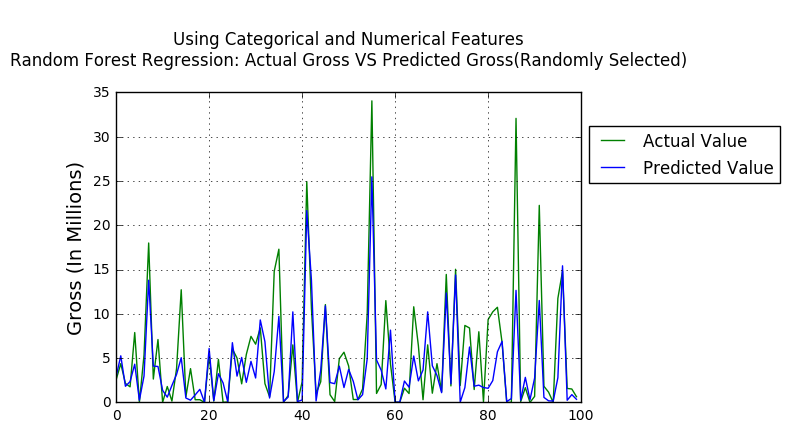

C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)



 Random Forest Regression  : Comparision of Actual Gross VS Predicted Gross(Random Sampling)[In Millions]

Actual Gross:  2.6761283 ,   Predicted Gross:  3.074274788
Actual Gross:  5.3574088 ,   Predicted Gross:  2.97943268
Actual Gross:  0.1186323 ,   Predicted Gross:  0.105338185635
Actual Gross:  28.5761243 ,   Predicted Gross:  11.795646905
Actual Gross:  2.5296447 ,   Predicted Gross:  1.07600516167
Actual Gross:  1.4003141 ,   Predicted Gross:  0.335465445697
Actual Gross:  11.7559438 ,   Predicted Gross:  2.795098428
Actual Gross:  16.778096 ,   Predicted Gross:  3.87908210929
Actual Gross:  3.4531832 ,   Predicted Gross:  2.518141925
Actual Gross:  0.6517198 ,   Predicted Gross:  0.0760787031333
Actual Gross:  0.1445366 ,   Predicted Gross:  0.0546963250578
Actual Gross:  0.022883 ,   Predicted Gross:  0.0338857910141
Actual Gross:  0.1445366 ,   Predicted Gross:  0.0546963250578
Actual Gross:  7.6261036 ,   Predicted Gross:  6.35182732
Actual Gross:  1.6017403 ,   Predicted G

C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


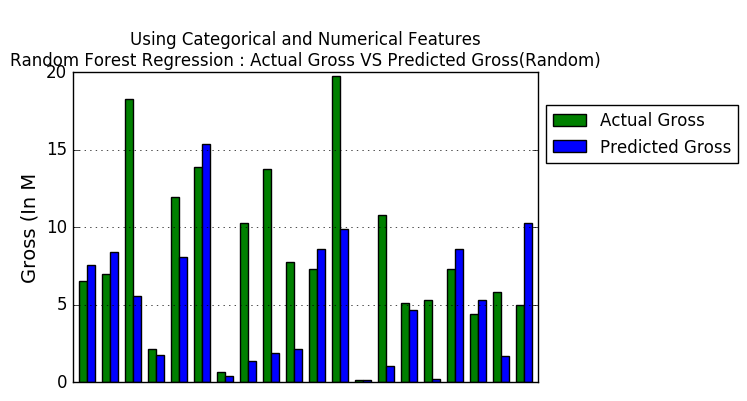

Regression Model Name:  Decision Tree Regression


C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda


Cross Validation Score (Mean Absolute Error)        : 
 [ 0.09590462  0.04626542  0.04034465  0.02804847  0.01806982]

Cross Validation Score (Mean Absolute Error) (Mean) : 
 0.0457265970175


C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Anjana\Anaconda3\lib\si


Cross Validation Score (Mean Squared Error)         : 
 [ 0.01866033  0.00483358  0.00418089  0.0026858   0.00150479]

Cross Validation Score (Mean Squared Error)  (Mean) : 
 0.00637307954141
Regression Model Name:  Decision Tree Regression



Regression Scores(train_test_split):

Mean Absolute Error    : 0.042595925559
Mean Squared Error     : 0.00627335345906
Median Absolute Error  : 0.0206232734035
Explained Var Score    : 0.204064314343
R^2 Score              : 0.179346456199





C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


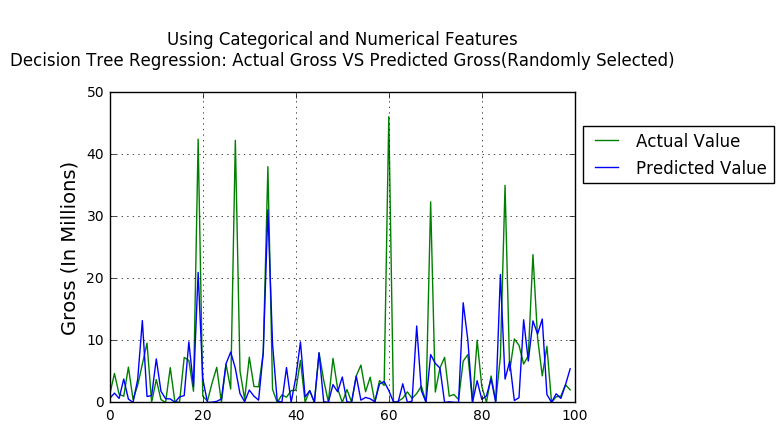

C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)



 Decision Tree Regression  : Comparision of Actual Gross VS Predicted Gross(Random Sampling)[In Millions]

Actual Gross:  10.793 ,   Predicted Gross:  2.0338609
Actual Gross:  0.0265107 ,   Predicted Gross:  0.0100421
Actual Gross:  0.0045661 ,   Predicted Gross:  0.0206515154639
Actual Gross:  2.2717758 ,   Predicted Gross:  2.4006726
Actual Gross:  0.8828771 ,   Predicted Gross:  0.0132587714286
Actual Gross:  2.6284475 ,   Predicted Gross:  1.9057024
Actual Gross:  25.1188924 ,   Predicted Gross:  0.4496583
Actual Gross:  0.413164 ,   Predicted Gross:  0.4855632
Actual Gross:  7.5072454 ,   Predicted Gross:  3.1491399
Actual Gross:  2.5052 ,   Predicted Gross:  9.2001027
Actual Gross:  0.4040588 ,   Predicted Gross:  0.4710366
Actual Gross:  0.1043487 ,   Predicted Gross:  0.0311416857143
Actual Gross:  0.0444044 ,   Predicted Gross:  0.0250951333333
Actual Gross:  3.3305037 ,   Predicted Gross:  3.5635046
Actual Gross:  5.0007168 ,   Predicted Gross:  3.7023395
Actual Gross:  5.70

C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Anjana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


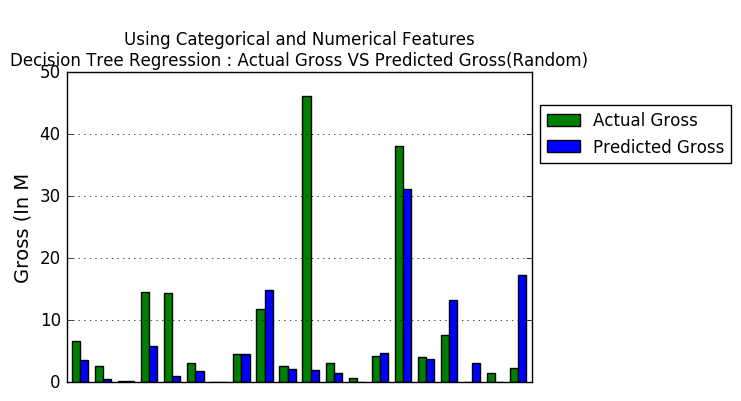

In [5]:
#Main function
path = "movie_metadata.csv"
data = data_target_extracted(path)
#data = data[(data.actor_1_facebook_likes > 0.0) & (data.actor_2_facebook_likes > 0.0) & (data.actor_3_facebook_likes > 0.0) & (data.director_facebook_likes > 0.0) & (data.cast_total_facebook_likes > 0.0) & (data.gross > 0.0)]
target = data['gross']
database = data.drop('gross', 1)
preprocessed_data = preprocessed_agregated_data(database)
target = preprocessing_numerical_minmax(target)
#print("_______________________________________________Random Forest Regressor Model_________________________________________")
randomForestRegressorModel = RandomForestRegressor()
regression_with_cross_validation(randomForestRegressorModel, preprocessed_data, target, 5, "Random Forest Regression")
regr_without_cross_validation_train_test_perform_plot(randomForestRegressorModel, preprocessed_data, target,"Random Forest Regression")
#print("_____________________________________________________________________________________________________________________")
#print("_____________________________________________________________________________________________________________________")
#print("_______________________________________________Decision Tree Regressor Model_________________________________________")
#print("")
DecisionTreeRegressorModel = tree.DecisionTreeRegressor()
regression_with_cross_validation(DecisionTreeRegressorModel, preprocessed_data, target, 5, "Decision Tree Regression")
regr_without_cross_validation_train_test_perform_plot(DecisionTreeRegressorModel, preprocessed_data, target, "Decision Tree Regression")


In [ ]:
path = "movie_metadata.csv"
data = data_target_extracted(path)


In [ ]:
#Plotting
actor_1_gross_mean_sort = meanbyfeature(data, 'actor_1_name', 'gross')
plot(actor_1_gross_mean_sort, 'bar', 'Actor 1 Sorted by Mean Gross', 30)


In [ ]:
actor_2_gross_mean_sort = meanbyfeature(data, 'actor_2_name', 'gross')
plot(actor_2_gross_mean_sort, 'bar', 'Actor 2 Sorted by Mean Gross', 30)

In [ ]:
actor_3_gross_mean_sort = meanbyfeature(data, 'actor_3_name', 'gross')
plot(actor_3_gross_mean_sort, 'bar', 'Actor 3 Sorted by Mean Gross', 30)



In [ ]:

director_gross_sort = meanbyfeature(data, 'director_name', 'gross')
plot(director_gross_sort, 'bar', 'Director sorted by mean gross', 30)



In [ ]:
country_gross_sort = meanbyfeature(data, 'country', 'gross')
plot(country_gross_sort, 'bar', 'Country sorted by mean gross', 30)


In [ ]:

content_rating_gross_sort = meanbyfeature(data, 'content_rating', 'gross')
plot(content_rating_gross_sort, 'bar', 'Content Rating Sorted by Mean Gross', 30)



In [ ]:
corr = data.corr()
c = plt.matshow(corr)
plt.colorbar(c)
plt.show()